In [12]:
import pandas as pd
import seaborn as sns
import numpy as np

In [13]:
df=pd.read_csv('/Users/abhaylal/Desktop/CS/DataScience-datsets/diabetes.csv')


In [14]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [15]:
remove_null=['Glucose','BloodPressure','SkinThickness','Insulin']
for i in remove_null:
    df[i]=df[i].replace(0,np.NaN)
    mean=int(df[i].mean(skipna=True))
    df[i]=df[i].replace(np.NaN,mean)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,155.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,155.0,30.1,0.349,47,1


In [16]:
df.shape

(768, 9)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [18]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.682292,72.386719,29.108073,155.28125,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.435999,12.096642,8.791221,85.02155,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.00000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.50000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,155.00000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.00000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.00000,67.100000,2.420000,81.000000,1.000000


# Standardize variables

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()

In [21]:
scaler.fit(df.drop('Outcome',axis=1))

StandardScaler()

In [22]:
scaled_features = scaler.transform(df.drop('Outcome',axis=1))

In [23]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865254,-0.031990,0.670643,-0.003310,0.204013,0.468492,1.425995
1,-0.844885,-1.206013,-0.528319,-0.012301,-0.003310,-0.684422,-0.365061,-0.190672
2,1.233880,2.015957,-0.693761,-0.012301,-0.003310,-1.103255,0.604397,-0.105584
3,-0.844885,-1.074504,-0.528319,-0.695245,-0.721243,-0.494043,-0.920763,-1.041549
4,-1.141852,0.503604,-2.679076,0.670643,0.149692,1.409746,5.484909,-0.020496


# Pairplot

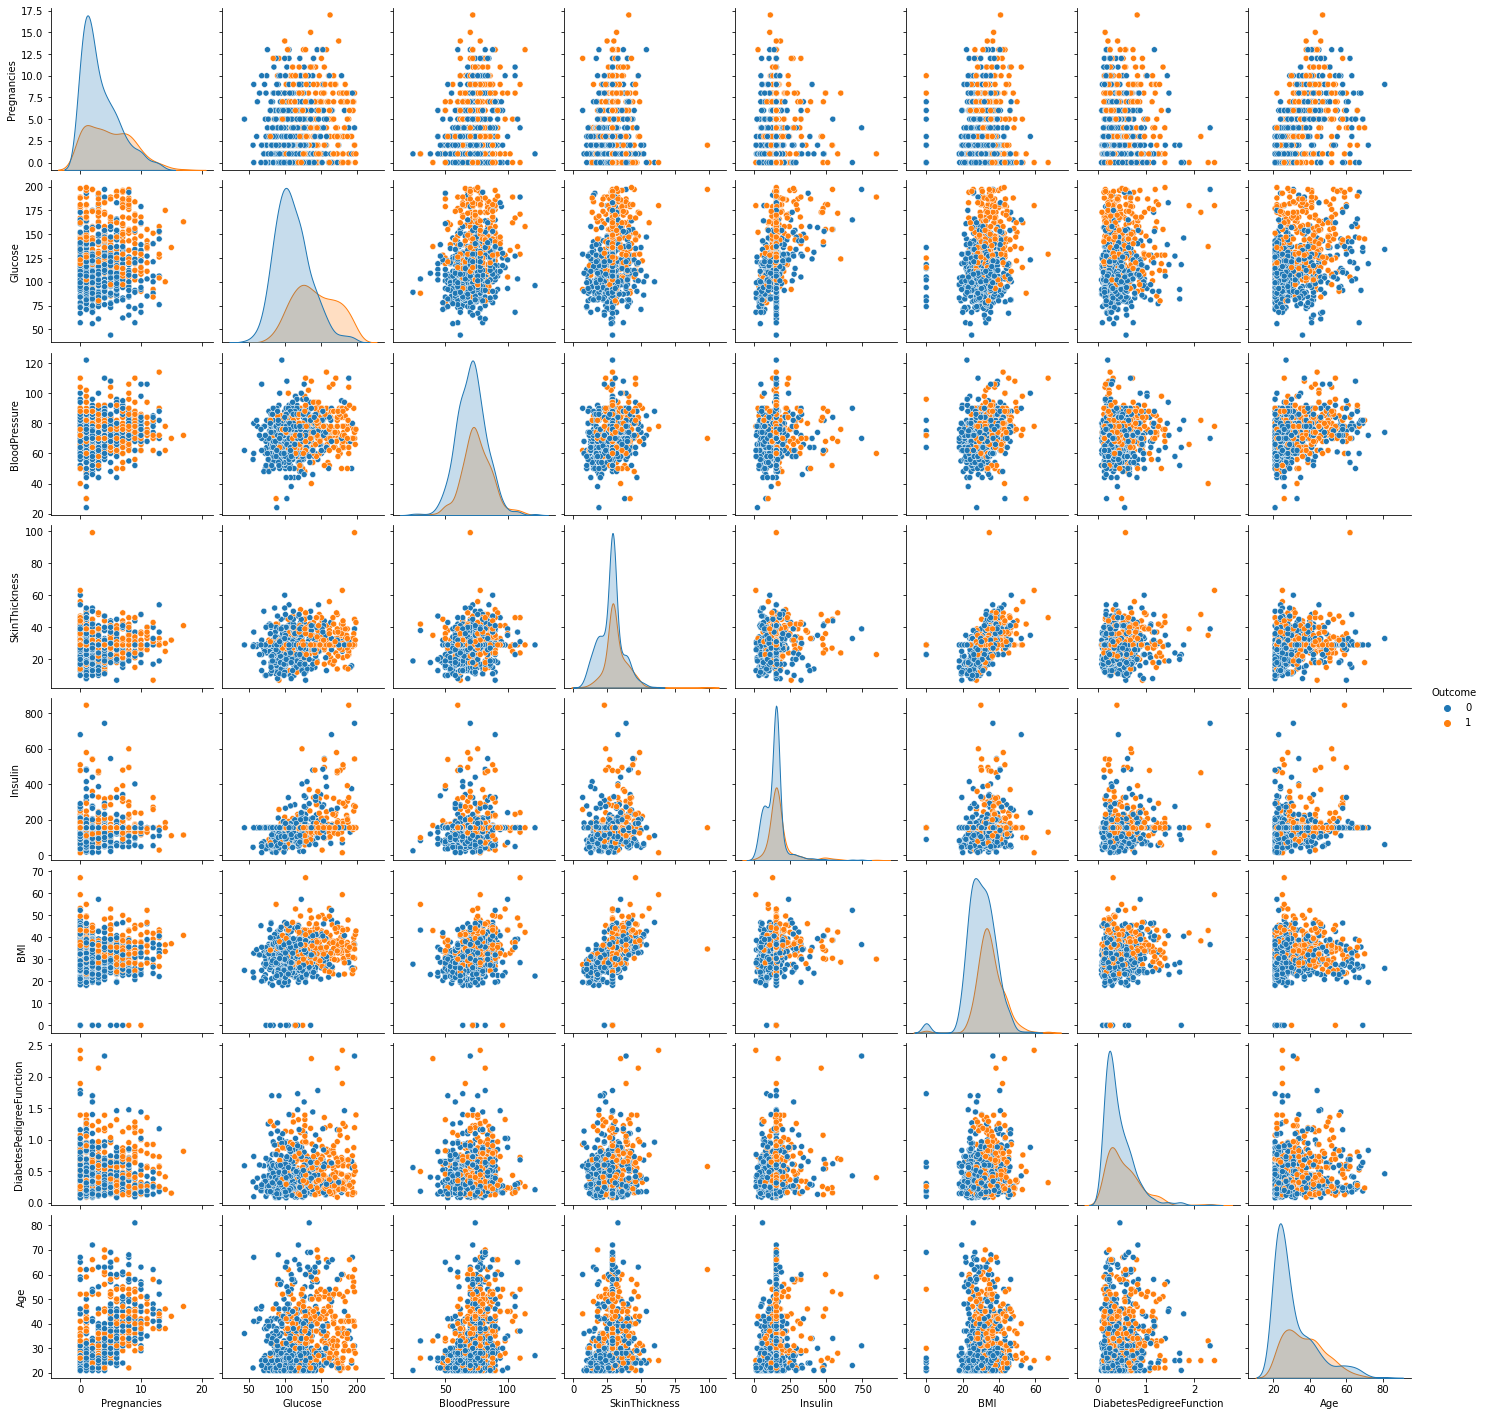

In [24]:
sns.pairplot(df,hue='Outcome')

# Training-test split and KNN

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Outcome'],
                                                    test_size=0.30,random_state=100)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn=KNeighborsClassifier(n_neighbors=1)


In [29]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [30]:
pred=knn.predict(X_test)

# Predictions

In [31]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score


In [32]:
print(confusion_matrix(y_test,pred))

[[117  33]
 [ 33  48]]


In [33]:
print(classification_report(y_test,pred))
from sklearn import metrics

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       150
           1       0.59      0.59      0.59        81

    accuracy                           0.71       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.71      0.71      0.71       231



For K=1 the accuracy is 66%

# Choosing a value for K

In [34]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['Outcome'],cv=10)
    error_rate.append(1-score.mean())

In [35]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

In [36]:
big=-1
#for i in range(1,40):
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
   # if(metrics.accuracy_score(y_test,pred)>big):
big=metrics.accuracy_score(y_test,pred)
#k=i
print(big*100)
print(k)

71.86147186147186


NameError: name 'k' is not defined

# Therefore the accuracy of the model is 74.45%